In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from sklearn.model_selection import KFold
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/BCMHUD/

Mounted at /content/drive/
/content/drive/MyDrive/BCMHUD


In [ ]:
# Đọc file CSV
dt = pd.read_csv('cambuoi.csv')

# Xem thông tin về dữ liệu
print("Thông tin dữ liệu:")
print("OpenML ID43387 - Oranges vs Grapefruit:")
print(dt.info())
print()
# In dử liệu
print("Dữ liệu ban dầu:")
print(dt.head())
# Xử lý dữ liệu thiếu ()
dt = dt.dropna()  # Loại bỏ các mẫu có dữ liệu thiếu
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Mã hoá cột 'name'
dt['name_encoded'] = label_encoder.fit_transform(dt['name'])
# Xoá cột 'name' sau khi mã hoá
dt = dt.drop('name', axis=1)
# In dữ liệu sau khi mã hoá
print("Dữ liệu sau khi mã hoá cột name:")
print(dt.head())
# Số lượng thuộc tính
num_attributes = len(dt.columns) - 1  # Trừ đi cột nhãn
print("Số lượng thuộc tính:", num_attributes)
# Số lượng nhãn
label_counts = dt['name_encoded'].value_counts()
print("Số lượng nhãn:")
print(label_counts)
print()

Thông tin dữ liệu:
OpenML ID43387 - Oranges vs Grapefruit:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None

Dữ liệu ban dầu:
     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9
Dữ liệu sau khi mã hoá cột name:
   diameter  weight  red  green  blue  name_encoded
0      2.96   86.76  172     85     2             1
1      3.91   88.05  1

In [ ]:
# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X = dt.drop(['name_encoded'], axis=1)  # Xóa cột nhãn
y = dt['name_encoded']  # Nhãn phân loại

In [ ]:
# Khởi tạo các list chứa kết quả
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [ ]:
#Dùng nghi thức hold-out chia dữ liệu thành 2 tập train(8) và test(2)

from sklearn.metrics import classification_report
# Tạo danh sách các tên giải thuật
algorithm_names = ['KNN', 'Random Forest', 'Naive Bayes', 'Decision Tree']
# Định nghĩa các giải thuật
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
# Khởi tạo các list chứa kết quả
accuracy_scores = []
# Tạo danh sách các tên giải thuật
algorithm_names = ['KNN', 'Random Forest', 'Naive Bayes', 'Decision Tree']

# Định nghĩa các giải thuật
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()

# Xáo trộn dữ liệu
X_shuffled, y_shuffled = shuffle(X, y)
# Khởi tạo list để lưu trữ kết quả của các chỉ số
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

# Lặp qua các giải thuật và tính toán các chỉ số
algorithms = [knn, rf, nb, dt]
for algorithm in algorithms:
    # Xáo trộn dữ liệu
    X_shuffled, y_shuffled = shuffle(X, y)

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)
    # Huấn luyện mô hình trên tập huấn luyện
    algorithm.fit(X_train, y_train)

    # Dự đoán nhãn cho tập kiểm tra
    y_pred = algorithm.predict(X_test)

    # Tính toán các chỉ số
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)#output_dict = True (đầu ra là một danh sách chứa các chỉ số đánh giá)

    # Trích xuất F1-score, recall và precision cho từng giải thuật
    f1_score = report['macro avg']['f1-score']
    recall = report['macro avg']['recall']
    precision = report['macro avg']['precision']

    # Lưu kết quả vào list
    accuracy_scores.append(accuracy)
    f1_scores.append(f1_score)
    recall_scores.append(recall)
    precision_scores.append(precision)

    # In kết quả
    print(f"Giải thuật: {algorithm}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-score: {f1_score}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print("--------------------")

Giải thuật: KNeighborsClassifier()
Accuracy: 0.91
F1-score: 0.9099847874290756
Recall: 0.9099847874290755
Precision: 0.9099847874290755
--------------------
Giải thuật: RandomForestClassifier()
Accuracy: 0.9565
F1-score: 0.9564975529873556
Recall: 0.956599373369295
Precision: 0.9567980902756934
--------------------
Giải thuật: GaussianNB()
Accuracy: 0.917
F1-score: 0.9169946876600104
Recall: 0.9169850114604126
Precision: 0.9170117011701171
--------------------
Giải thuật: DecisionTreeClassifier()
Accuracy: 0.9345
F1-score: 0.9344998526246684
Recall: 0.9345129106161956
Precision: 0.9345246428871439
--------------------


In [ ]:
#K-FOLD thích hợp với tập dử liệu Oranges vs Grapefruit do đây là một tập dử liệu lớn
# K-fold cross-validation chia tập dữ liệu thành k phần bằng nhau (gọi là folds),
# mỗi lần chọn một fold làm tập kiểm tra và các fold còn lại là tập huấn luyện.
# Quá trình này được lặp lại k lần, mỗi lần chọn một fold khác nhau làm tập kiểm tra.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Khởi tạo các list chứa kết quả
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

# Tạo danh sách các tên giải thuật
algorithm_names = ['KNN', 'Random Forest', 'Naive Bayes', 'Decision Tree']

kf = KFold(n_splits=10, shuffle=True)

# Lặp qua các giải thuật và tính toán các chỉ số
algorithms = [knn, rf, nb, dt]
for algorithm, algorithm_name in zip(algorithms, algorithm_names):
    # Thực hiện k-fold cross-validation với KFold object đã tạo
    y_pred = cross_val_predict(algorithm, X, y,cv=kf)

    # Tính toán các chỉ số accuracy, recall, precision và F1-score
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='macro')
    precision = precision_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')

    # Lưu kết quả vào list
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)

# In kết quả các độ đo đánh giá
for algorithm_name, accuracy, recall, precision, f1 in zip(algorithm_names, accuracy_scores, recall_scores, precision_scores, f1_scores):
    print(f"Giải thuật: {algorithm_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1-score: {f1}")
    print("--------------------")

Giải thuật: KNN
Accuracy: 0.9162
Recall: 0.9161999999999999
Precision: 0.9162042619316422
F1-score: 0.9161997854714508
--------------------
Giải thuật: Random Forest
Accuracy: 0.9565
Recall: 0.9565
Precision: 0.9565920672244351
F1-score: 0.9564978070544536
--------------------
Giải thuật: Naive Bayes
Accuracy: 0.9212
Recall: 0.9212
Precision: 0.9212024261259745
F1-score: 0.9211998865278367
--------------------
Giải thuật: Decision Tree
Accuracy: 0.9419
Recall: 0.9419
Precision: 0.9419077952535082
F1-score: 0.94189974377787
--------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình RandomForestClassifier
rf_model = RandomForestClassifier()

# Huấn luyện mô hình trên toàn bộ dữ liệu
rf_model.fit(X, y)

#(2.96	86.76	172	85	2) thuộc tính của cam sẳn có
X1 = [[3.31, 87.52, 168, 79, 5],]

#(11.28	194.83	153	67	12) thuộc tính bưởi sẳn có
X = [[15, 199.25, 130, 80, 10]] #Tạo một phần tử X tương tự

# Dự đoán nhãn Y cho phần tử X mới
predicted_label = rf_model.predict(X)

# In kết quả dự đoán
for label in predicted_label:
    if label == 0:
        print("Dự đoán: Bưởi")
    else:
        print("Dự đoán: Cam")

Dự đoán: Bưởi


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Tạo đối tượng KFold với shuffle=True
kf = KFold(n_splits=10, shuffle=True)

# Khởi tạo các list chứa kết quả
accuracy_scores = []
other_scores = []

# Lặp qua các giải thuật và tính toán các chỉ số
algorithms = [knn, rf, nb, dt]
for algorithm, algorithm_name in zip(algorithms, algorithm_names):
    # Thực hiện k-fold cross-validation với KFold object đã tạo
    scores = cross_val_score(algorithm, X, y, cv=kf)

    # Lưu kết quả vào list
    accuracy_scores.append(scores.mean())
    other_scores.append(scores)

# In kết quả trung bình của các độ đo đánh giá
for algorithm_name, accuracy, other in zip(algorithm_names, accuracy_scores, other_scores):
    print(f"Giải thuật: {algorithm_name}")
    print(f"Accuracy: {accuracy}")
    print("Các chỉ số khác:")
    for i, score in enumerate(other):
        print(f"Acc {i+1}: {score}")
    print("--------------------")

ValueError: ignored

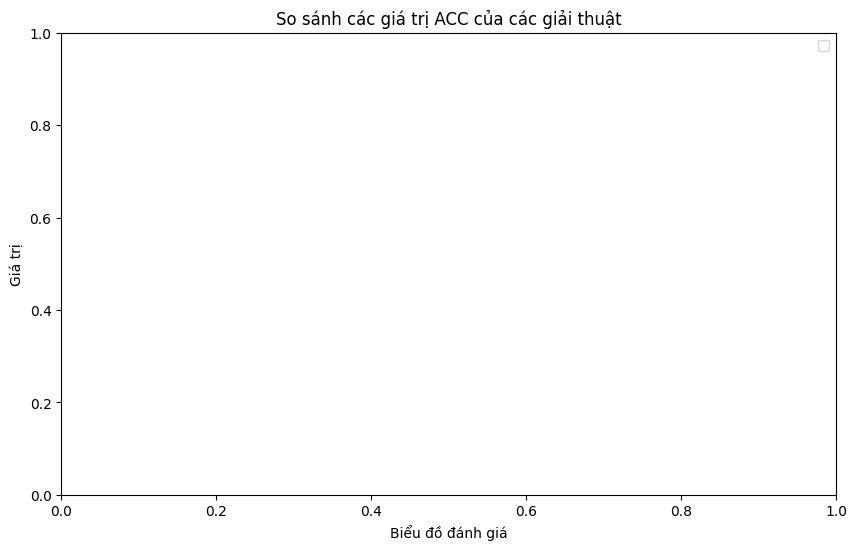

In [ ]:
import matplotlib.pyplot as plt

# Tạo một hình vẽ mới với kích thước lớn
plt.figure(figsize=(10, 6))

# Tạo một list chứa số lượt cross-validation (1 đến 10)
cv_splits = np.arange(1, 11)

# Vẽ biểu đồ so sánh từ score 1 đến score 10 của các giải thuật
for algorithm_name, other in zip(algorithm_names, other_scores):
    plt.plot(cv_splits, other, label=algorithm_name)
    # Hiển thị chỉ số trên mỗi đường thẳng
    for i, score in enumerate(other):
        plt.text(cv_splits[i], score, f"{score:.2f}", ha='center', va='bottom')

# Đặt các thông tin trên đồ thị
plt.xlabel("Biểu đồ đánh giá")
plt.ylabel("Giá trị")
plt.title("So sánh các giá trị ACC của các giải thuật")
plt.legend()

# Hiển thị đồ thị
plt.show()